In [1]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#create function to connect the database
def Create_db_connection(host_name,user_name,user_password ,db_name):
    connection = None
    try:
        connection=mysql.connector.connect( host = host_name,
                                            user = user_name,
                                            passwd = user_password,
                                            database=db_name)
        print('Mysql Database connection successful')
    except Error as err:
        print('Error: ' , err)
    return connection

In [3]:
# connect to the database
host = 'relational.fit.cvut.cz'
user = 'guest'
pw = 'relational'
db = 'financial'
connection = Create_db_connection(host , user , pw , db)

Mysql Database connection successful


In [4]:
# create function to read the query 
def read_query(connection,query):
    cursor = connection.cursor()
    result=None
    try:
        cursor.execute(query)
        result=cursor.fetchall()
        return result
    except Error as err:
        print(f"Error :" , err)

In [5]:
connection

In [6]:
# read the query to get the table 
q1 = """
select t4.*, l.loan_id , l.amount as lone_amount , l.duration as loan_duration , l.status as loan_status
from loan l 
right join (select t2.* , t3.NO_of_trans
			from    (select t1.* , dis.a4 as no_of_inhabitants , 
							 dis.a5 + dis.a6 + dis.a7 +dis.a8 as no_of_municipalities , 
							 dis.a9 as ratio_of_urban_inhabitants , dis.a10 as average_salary,
							 dis.a13 as unemploymant_rate , dis.a14 as no_of_enterpreneurs_per_1000_inhabitants,
							 dis.a16 as no_of_commited_crimes
					 from district as dis
					 join(select   a.account_id , a.date as account_data , a.district_id ,
								   a.frequency as acount_frequency , c.client_id ,
								   c.gender as clint_gender , c.birth_date as clint_DOB,
								   ca.type  as card_type, ca.issued as card_issued
						  from account a
						  join disp d using(account_id)
						  join client c using(client_id)
						  left join card ca using(disp_id)
						  where d.type = 'owner') as t1 
					 on t1.district_id = dis.district_id) as  t2
			left join  (select account_id ,count(trans_id) as NO_of_trans
						from trans
						group by account_id) t3
			on t2.account_id = t3.account_id) t4
on l.account_id = t4.account_id;
"""
account = read_query(connection,q1)
columns=['account_id', 'account_date', 'district_id', 'account_frequency', 'client_id',
         'clint_gender', 'clint_DOB', 'card_type', 'card_issued', 'no_of_inhabitants',
         'no_of_municipalities', 'ratio_of_urban_inhabitants', 'average_salary', 
         'unemploymant_rate', 'no_of_enterpreneurs_per_1000_inhabitants',
         'no_of_commited_crimes', 'NO_of_trans', 'loan_id', 'lone_amount', 
         'loan_duration', 'loan_status']
account_loan_info_df = pd.DataFrame(account , columns=columns )
account_loan_info_df 

,account_id,account_date,district_id,account_frequency,client_id,clint_gender,clint_DOB,card_type,card_issued,no_of_inhabitants,...,ratio_of_urban_inhabitants,average_salary,unemploymant_rate,no_of_enterpreneurs_per_1000_inhabitants,no_of_commited_crimes,NO_of_trans,loan_id,lone_amount,loan_duration,loan_status
0,2,1993-02-26,1,POPLATEK MESICNE,2,M,1945-02-04,None,None,1204953,...,1,100.0,0.43,167,99107,478,4959.0,80952.0,24.0,A
1,17,1997-01-08,1,POPLATEK MESICNE,22,F,1969-10-11,None,None,1204953,...,1,100.0,0.43,167,99107,54,NaN,NaN,NaN,None
2,22,1994-03-23,1,POPLATEK MESICNE,28,M,1945-09-29,None,None,1204953,...,1,100.0,0.43,167,99107,310,NaN,NaN,NaN,None
3,36,1993-07-01,1,POPLATEK MESICNE,44,F,1977-01-11,None,None,1204953,...,1,100.0,0.43,167,99107,388,NaN,NaN,NaN,None
4,49,1997-04-06,1,POPLATEK MESICNE,58,F,1927-04-29,None,None,1204953,...,1,100.0,0.43,167,99107,93,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,4631,1996-12-12,77,POPLATEK PO OBRATU,5579,M,1951-02-16,classic,1998-02-20,148545,...,4,53.5,5.56,113,3590,133,5933.0,87528.0,24.0,C
4496,5228,1993-06-23,77,POPLATEK PO OBRATU,6317,F,1957-01-27,None,None,148545,...,4,53.5,5.56,113,3590,454,6066.0,173808.0,24.0,A
4497,5817,1996-12-10,77,POPLATEK PO OBRATU,7043,M,1940-06-30,None,None,148545,...,4,53.5,5.56,113,3590,202,NaN,NaN,NaN,None
4498,7181,1996-07-02,77,POPLATEK PO OBRATU,8667,F,1967-02-12,None,None,148545,...,4,53.5,5.56,113,3590,296,6470.0,49872.0,12.0,C


# Problem Formulation
#### We want to investigate "what factors/variables affect a good or a bad loan"
#### Make predictions whether a customer should get its loan approved or not based on their characteristics
#### Hence our Dependent variable (y) is the Loan Approval (Yes/No) or if the Loan is Good or Bad

In [7]:
account_loan_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   account_id                                4500 non-null   int64  
 1   account_date                              4500 non-null   object 
 2   district_id                               4500 non-null   int64  
 3   account_frequency                         4500 non-null   object 
 4   client_id                                 4500 non-null   int64  
 5   clint_gender                              4500 non-null   object 
 6   clint_DOB                                 4500 non-null   object 
 7   card_type                                 892 non-null    object 
 8   card_issued                               892 non-null    object 
 9   no_of_inhabitants                         4500 non-null   int64  
 10  no_of_municipalities                

In [8]:
account_loan_info_df.account_date = pd.to_datetime(account_loan_info_df.account_date)
account_loan_info_df.clint_DOB = pd.to_datetime(account_loan_info_df.clint_DOB)
account_loan_info_df.card_issued = pd.to_datetime(account_loan_info_df.card_issued)

In [9]:
account_loan_info_df.account_frequency = pd.Categorical(account_loan_info_df.account_frequency)
account_loan_info_df.clint_gender = pd.Categorical(account_loan_info_df.clint_gender)
account_loan_info_df.card_type = pd.Categorical(account_loan_info_df.card_type)
account_loan_info_df.loan_status = pd.Categorical(account_loan_info_df.loan_status)

In [10]:
account_loan_info_df.account_frequency = account_loan_info_df.account_frequency.cat.codes

In [11]:
account_loan_info_df.account_frequency.value_counts()

0    4167
2     240
1      93
Name: account_frequency, dtype: int64

In [12]:
account_loan_info_df.clint_gender = account_loan_info_df.clint_gender.cat.codes

In [13]:
account_loan_info_df.clint_gender.value_counts()

1    2292
0    2208
Name: clint_gender, dtype: int64

In [14]:
account_loan_info_df.card_type = account_loan_info_df.card_type.cat.codes

In [15]:
account_loan_info_df.card_type.value_counts()

-1    3608
 0     659
 2     145
 1      88
Name: card_type, dtype: int64

In [16]:
account_loan_info_df.loan_status = account_loan_info_df.loan_status.cat.codes

In [17]:
account_loan_info_df.loan_status.value_counts()

-1    3818
 2     403
 0     203
 3      45
 1      31
Name: loan_status, dtype: int64

In [18]:
account_loan_info_df.average_salary = account_loan_info_df.average_salary.astype('float64')
account_loan_info_df.unemploymant_rate = account_loan_info_df.unemploymant_rate.astype('float64')

In [19]:
account_loan_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   account_id                                4500 non-null   int64         
 1   account_date                              4500 non-null   datetime64[ns]
 2   district_id                               4500 non-null   int64         
 3   account_frequency                         4500 non-null   int8          
 4   client_id                                 4500 non-null   int64         
 5   clint_gender                              4500 non-null   int8          
 6   clint_DOB                                 4500 non-null   datetime64[ns]
 7   card_type                                 4500 non-null   int8          
 8   card_issued                               892 non-null    datetime64[ns]
 9   no_of_inhabitants             

In [20]:
account_loan_info_df.drop(['account_id','client_id','card_type','card_issued','loan_id'],axis= 1 , inplace=True)
account_loan_info_df

,account_date,district_id,account_frequency,clint_gender,clint_DOB,no_of_inhabitants,no_of_municipalities,ratio_of_urban_inhabitants,average_salary,unemploymant_rate,no_of_enterpreneurs_per_1000_inhabitants,no_of_commited_crimes,NO_of_trans,lone_amount,loan_duration,loan_status
0,1993-02-26,1,0,1,1945-02-04,1204953,1,1,100.0,0.43,167,99107,478,80952.0,24.0,0
1,1997-01-08,1,0,0,1969-10-11,1204953,1,1,100.0,0.43,167,99107,54,NaN,NaN,-1
2,1994-03-23,1,0,1,1945-09-29,1204953,1,1,100.0,0.43,167,99107,310,NaN,NaN,-1
3,1993-07-01,1,0,0,1977-01-11,1204953,1,1,100.0,0.43,167,99107,388,NaN,NaN,-1
4,1997-04-06,1,0,0,1927-04-29,1204953,1,1,100.0,0.43,167,99107,93,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,1996-12-12,77,1,1,1951-02-16,148545,58,4,53.5,5.56,113,3590,133,87528.0,24.0,2
4496,1993-06-23,77,1,0,1957-01-27,148545,58,4,53.5,5.56,113,3590,454,173808.0,24.0,0
4497,1996-12-10,77,1,1,1940-06-30,148545,58,4,53.5,5.56,113,3590,202,NaN,NaN,-1
4498,1996-07-02,77,1,0,1967-02-12,148545,58,4,53.5,5.56,113,3590,296,49872.0,12.0,2


In [21]:
# create function to split the date columns to Year , Month , Day 
def split_dates(df , date):
    df[date+'_year'] = df[date].dt.year
    df[date+'_month'] = df[date].dt.month
    df[date+'_day'] = df[date].dt.day
    df.drop(date , axis = 1 , inplace=True)
    return df

In [22]:
split_dates(account_loan_info_df , 'account_date')

,district_id,account_frequency,clint_gender,clint_DOB,no_of_inhabitants,no_of_municipalities,ratio_of_urban_inhabitants,average_salary,unemploymant_rate,no_of_enterpreneurs_per_1000_inhabitants,no_of_commited_crimes,NO_of_trans,lone_amount,loan_duration,loan_status,account_date_year,account_date_month,account_date_day
0,1,0,1,1945-02-04,1204953,1,1,100.0,0.43,167,99107,478,80952.0,24.0,0,1993,2,26
1,1,0,0,1969-10-11,1204953,1,1,100.0,0.43,167,99107,54,NaN,NaN,-1,1997,1,8
2,1,0,1,1945-09-29,1204953,1,1,100.0,0.43,167,99107,310,NaN,NaN,-1,1994,3,23
3,1,0,0,1977-01-11,1204953,1,1,100.0,0.43,167,99107,388,NaN,NaN,-1,1993,7,1
4,1,0,0,1927-04-29,1204953,1,1,100.0,0.43,167,99107,93,NaN,NaN,-1,1997,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,77,1,1,1951-02-16,148545,58,4,53.5,5.56,113,3590,133,87528.0,24.0,2,1996,12,12
4496,77,1,0,1957-01-27,148545,58,4,53.5,5.56,113,3590,454,173808.0,24.0,0,1993,6,23
4497,77,1,1,1940-06-30,148545,58,4,53.5,5.56,113,3590,202,NaN,NaN,-1,1996,12,10
4498,77,1,0,1967-02-12,148545,58,4,53.5,5.56,113,3590,296,49872.0,12.0,2,1996,7,2


In [23]:
split_dates(account_loan_info_df , 'clint_DOB')

,district_id,account_frequency,clint_gender,no_of_inhabitants,no_of_municipalities,ratio_of_urban_inhabitants,average_salary,unemploymant_rate,no_of_enterpreneurs_per_1000_inhabitants,no_of_commited_crimes,NO_of_trans,lone_amount,loan_duration,loan_status,account_date_year,account_date_month,account_date_day,clint_DOB_year,clint_DOB_month,clint_DOB_day
0,1,0,1,1204953,1,1,100.0,0.43,167,99107,478,80952.0,24.0,0,1993,2,26,1945,2,4
1,1,0,0,1204953,1,1,100.0,0.43,167,99107,54,NaN,NaN,-1,1997,1,8,1969,10,11
2,1,0,1,1204953,1,1,100.0,0.43,167,99107,310,NaN,NaN,-1,1994,3,23,1945,9,29
3,1,0,0,1204953,1,1,100.0,0.43,167,99107,388,NaN,NaN,-1,1993,7,1,1977,1,11
4,1,0,0,1204953,1,1,100.0,0.43,167,99107,93,NaN,NaN,-1,1997,4,6,1927,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,77,1,1,148545,58,4,53.5,5.56,113,3590,133,87528.0,24.0,2,1996,12,12,1951,2,16
4496,77,1,0,148545,58,4,53.5,5.56,113,3590,454,173808.0,24.0,0,1993,6,23,1957,1,27
4497,77,1,1,148545,58,4,53.5,5.56,113,3590,202,NaN,NaN,-1,1996,12,10,1940,6,30
4498,77,1,0,148545,58,4,53.5,5.56,113,3590,296,49872.0,12.0,2,1996,7,2,1967,2,12


In [24]:
accout_have_not_loan = account_loan_info_df[account_loan_info_df['loan_status'] == -1]
accout_have_not_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 1 to 4497
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   district_id                               3818 non-null   int64  
 1   account_frequency                         3818 non-null   int8   
 2   clint_gender                              3818 non-null   int8   
 3   no_of_inhabitants                         3818 non-null   int64  
 4   no_of_municipalities                      3818 non-null   int64  
 5   ratio_of_urban_inhabitants                3818 non-null   int64  
 6   average_salary                            3818 non-null   float64
 7   unemploymant_rate                         3818 non-null   float64
 8   no_of_enterpreneurs_per_1000_inhabitants  3818 non-null   int64  
 9   no_of_commited_crimes                     3818 non-null   int64  
 10  NO_of_trans                         

In [25]:
accout_have_loan = account_loan_info_df[account_loan_info_df['loan_status'] != -1]
accout_have_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 4499
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   district_id                               682 non-null    int64  
 1   account_frequency                         682 non-null    int8   
 2   clint_gender                              682 non-null    int8   
 3   no_of_inhabitants                         682 non-null    int64  
 4   no_of_municipalities                      682 non-null    int64  
 5   ratio_of_urban_inhabitants                682 non-null    int64  
 6   average_salary                            682 non-null    float64
 7   unemploymant_rate                         682 non-null    float64
 8   no_of_enterpreneurs_per_1000_inhabitants  682 non-null    int64  
 9   no_of_commited_crimes                     682 non-null    int64  
 10  NO_of_trans                          

In [26]:
accout_have_loan['loan_status'] = accout_have_loan['loan_status'].map({0:1,2:1,1:2,3:2})

C:\Users\al_mu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
accout_have_loan

,district_id,account_frequency,clint_gender,no_of_inhabitants,no_of_municipalities,ratio_of_urban_inhabitants,average_salary,unemploymant_rate,no_of_enterpreneurs_per_1000_inhabitants,no_of_commited_crimes,NO_of_trans,lone_amount,loan_duration,loan_status,account_date_year,account_date_month,account_date_day,clint_DOB_year,clint_DOB_month,clint_DOB_day
0,1,0,1,1204953,1,1,100.0,0.43,167,99107,478,80952.0,24.0,1,1993,2,26,1945,2,4
43,1,0,0,1204953,1,1,100.0,0.43,167,99107,444,252060.0,60.0,2,1993,11,29,1965,8,3
72,1,0,0,1204953,1,1,100.0,0.43,167,99107,281,76944.0,12.0,1,1996,3,3,1956,9,13
170,1,0,0,1204953,1,1,100.0,0.43,167,99107,499,78936.0,12.0,1,1993,5,9,1957,1,22
202,1,0,0,1204953,1,1,100.0,0.43,167,99107,169,37944.0,36.0,1,1996,6,14,1966,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,77,0,1,148545,58,4,53.5,5.56,113,3590,141,41988.0,12.0,1,1997,2,20,1973,3,9
4495,77,1,1,148545,58,4,53.5,5.56,113,3590,133,87528.0,24.0,1,1996,12,12,1951,2,16
4496,77,1,0,148545,58,4,53.5,5.56,113,3590,454,173808.0,24.0,1,1993,6,23,1957,1,27
4498,77,1,0,148545,58,4,53.5,5.56,113,3590,296,49872.0,12.0,1,1996,7,2,1967,2,12


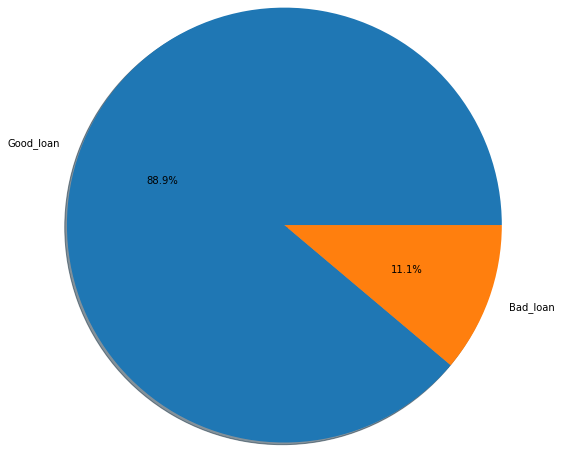

In [28]:
plt.figure(figsize=(7,5))
plt.pie(accout_have_loan['loan_status'].value_counts() ,labels=['Good_loan' , 'Bad_loan'],autopct='%0.1f%%',radius=2,shadow=True )
plt.show()

In [29]:
x_feature = accout_have_loan.drop('loan_status' , axis=1)
y_feature = accout_have_loan['loan_status']

In [30]:
x_feature

,district_id,account_frequency,clint_gender,no_of_inhabitants,no_of_municipalities,ratio_of_urban_inhabitants,average_salary,unemploymant_rate,no_of_enterpreneurs_per_1000_inhabitants,no_of_commited_crimes,NO_of_trans,lone_amount,loan_duration,account_date_year,account_date_month,account_date_day,clint_DOB_year,clint_DOB_month,clint_DOB_day
0,1,0,1,1204953,1,1,100.0,0.43,167,99107,478,80952.0,24.0,1993,2,26,1945,2,4
43,1,0,0,1204953,1,1,100.0,0.43,167,99107,444,252060.0,60.0,1993,11,29,1965,8,3
72,1,0,0,1204953,1,1,100.0,0.43,167,99107,281,76944.0,12.0,1996,3,3,1956,9,13
170,1,0,0,1204953,1,1,100.0,0.43,167,99107,499,78936.0,12.0,1993,5,9,1957,1,22
202,1,0,0,1204953,1,1,100.0,0.43,167,99107,169,37944.0,36.0,1996,6,14,1966,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,77,0,1,148545,58,4,53.5,5.56,113,3590,141,41988.0,12.0,1997,2,20,1973,3,9
4495,77,1,1,148545,58,4,53.5,5.56,113,3590,133,87528.0,24.0,1996,12,12,1951,2,16
4496,77,1,0,148545,58,4,53.5,5.56,113,3590,454,173808.0,24.0,1993,6,23,1957,1,27
4498,77,1,0,148545,58,4,53.5,5.56,113,3590,296,49872.0,12.0,1996,7,2,1967,2,12


In [31]:
y_feature

0       1
43      2
72      1
170     1
202     1
       ..
4493    1
4495    1
4496    1
4498    1
4499    1
Name: loan_status, Length: 682, dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
scaler = StandardScaler()

In [34]:
x = scaler.fit_transform(x_feature)

In [35]:
x.shape

(682, 19)

In [36]:
y = y_feature
y.shape

(682,)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

In [38]:
x_train.shape

(545, 19)

In [39]:
x_test.shape

(137, 19)

In [40]:
y_train.shape

(545,)

In [41]:
y_test.shape

(137,)

In [42]:
model = LogisticRegression()

In [43]:
model.fit(x_train , y_train)

LogisticRegression()

In [44]:
y_pred = model.predict(x_test)

In [45]:
model.predict_proba(x_test)

array([[0.90535747, 0.09464253],
       [0.95172549, 0.04827451],
       [0.83428422, 0.16571578],
       [0.79709847, 0.20290153],
       [0.73039933, 0.26960067],
       [0.90011285, 0.09988715],
       [0.87768238, 0.12231762],
       [0.99188278, 0.00811722],
       [0.89517363, 0.10482637],
       [0.9554413 , 0.0445587 ],
       [0.94537436, 0.05462564],
       [0.93459934, 0.06540066],
       [0.92689942, 0.07310058],
       [0.78701618, 0.21298382],
       [0.92474702, 0.07525298],
       [0.91447366, 0.08552634],
       [0.68693415, 0.31306585],
       [0.90957826, 0.09042174],
       [0.77678761, 0.22321239],
       [0.89612013, 0.10387987],
       [0.97989639, 0.02010361],
       [0.87675862, 0.12324138],
       [0.98066096, 0.01933904],
       [0.96813809, 0.03186191],
       [0.9151314 , 0.0848686 ],
       [0.74666592, 0.25333408],
       [0.88771724, 0.11228276],
       [0.93226444, 0.06773556],
       [0.96348152, 0.03651848],
       [0.92855724, 0.07144276],
       [0.

In [46]:
model.score(x_test,y_test)

0.8759124087591241

In [47]:
model.intercept_

array([-2.38645508])

In [48]:
model.coef_

array([[-0.07627576,  0.04647847, -0.04189318,  0.05897143, -0.22211145,
        -0.17440711, -0.04043274, -0.15805859, -0.28284723, -0.25739823,
        -0.68649341,  0.7197945 , -0.39847838, -1.12409511,  0.09017409,
         0.18751005, -0.11071789,  0.123303  , -0.03294702]])

In [49]:
w0 = model.intercept_[0]
w = w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19 = model.coef_[0]
w

array([-0.07627576,  0.04647847, -0.04189318,  0.05897143, -0.22211145,
       -0.17440711, -0.04043274, -0.15805859, -0.28284723, -0.25739823,
       -0.68649341,  0.7197945 , -0.39847838, -1.12409511,  0.09017409,
        0.18751005, -0.11071789,  0.123303  , -0.03294702])

In [50]:
x_feature.columns

Index(['district_id', 'account_frequency', 'clint_gender', 'no_of_inhabitants',
       'no_of_municipalities', 'ratio_of_urban_inhabitants', 'average_salary',
       'unemploymant_rate', 'no_of_enterpreneurs_per_1000_inhabitants',
       'no_of_commited_crimes', 'NO_of_trans', 'lone_amount', 'loan_duration',
       'account_date_year', 'account_date_month', 'account_date_day',
       'clint_DOB_year', 'clint_DOB_month', 'clint_DOB_day'],
      dtype='object')

In [51]:
import math

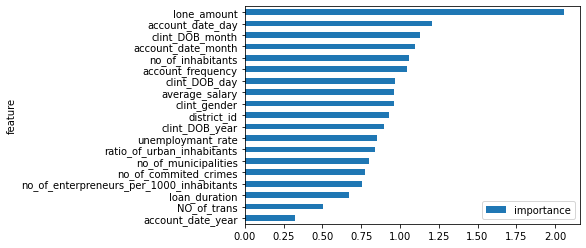

In [52]:
feature_importance = pd.DataFrame(x_feature.columns , columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

In [53]:
feature_importance.sort_values('importance' , ascending=False)

,feature,importance
11,lone_amount,2.054011
15,account_date_day,1.206242
17,clint_DOB_month,1.131227
14,account_date_month,1.094365
3,no_of_inhabitants,1.060745
1,account_frequency,1.047576
18,clint_DOB_day,0.967590
6,average_salary,0.960374
2,clint_gender,0.958972
0,district_id,0.926561
